In [1]:
#%pip install -q --upgrade pip


In [ ]:
#using this cell to import the necessary libraries for the notebook
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [3]:
# setting pandas options to display more columns and rows in the output
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 110530)

# setting pandas options to expand the DataFrame representation
pd.set_option('display.expand_frame_repr', True)

# pd.set_option('future.no_silent_downcasting', True) is used to control the behavior of downcasting in pandas.
pd.set_option('future.no_silent_downcasting', True)

# use this to reset all options to default
# pd.reset_option(`all`)

In [4]:
# reading the CSV file into a pandas Dataframe
# 
df = pd.read_csv('../session-1/Insurance.csv')

# peaking at the df to have an overview of the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# didplaying shape to peak at dimensions
df.shape

(1338, 7)

In [6]:
# displaying the info of the df to understand data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# cheching for missing values and handling them
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

1

Here we also found one duplicated row and droped it

In [9]:
print(df[df.duplicated(keep=False)])  
# Check and show only duplicates in the entire DataFrame where if you don't use df[] it will return a df with all rows 
# labeled true and false
# This happens because df[condition] returns only the seleted rows that meat the condition

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [10]:
# removing duplicate rows and resetting the index to avoid index issues 
# after dropping duplicates the index is not automatically reset so we need to do it manually
# the cleanest way to do this is to chain methods and reassign df = df.drop_duplicates().reset_index(drop=True)
# you can not chain and use inplace = True at the same time because it returns null and you can't use methods with null
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# getting a statistical summary of the df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [12]:
# getting the correlation matrix of the numeric columns in the df to understand relationships between them
# using numeric_only=True to avoid errors with non-numeric columns
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


in here we see no values approaching 1 meaning no need to drop any of these features but we can also encode the remaining features and then redo the correlation matrix

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

here we can see that sex, and smoker features can be encoded to 0 and 1, with the remaining region feature we can use one-hot encoder

In [14]:
# displaying the unique values in each column to understand the data better
for column in df.columns:
    print(f"{column}: {df[column].unique()[:10]}")  # Displaying only the first 10 unique values for brevity

age: [19 18 28 33 32 31 46 37 60 25]
sex: ['female' 'male']
bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84 ]
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']
charges: [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]


In [15]:
# encoding categorical variables (sex and smoker) using one-hot encoding
# when using inplce=True with replce it wil raise a warning because it is trying to set a vlue on a copy of the column not afecting the original df
# to avoid this warning we can use the .replace() method without inplace=True and reassign the column
# I used the .astype(int) to void the silent conversion when using .replce() and avoid the warning and future proofing the code
df['sex'] = df['sex'].replace({'female': 0, 'male': 1}).astype(int)
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1}).astype(int)

In [16]:
# peaaking at the df again to see the changes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
# now encoding the region column using one-hot encoding
# One-hot encodes the column region.
# Adds the resulting dummy/indicator variables to the DataFrame.
# Drops the original region column.
# Keeps all new columns except the first category, to avoid multicollinearity.
# df = pd.get_dummies(df, columns=['region'], drop_first=True)

# for df with mny objects to encode we can use the following code
# df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True) or 

# object_columns = df.select_dtypes(include=['object']).columns
# from category_encoders import OneHotEncoder, BinaryEncoder
# encoder = OneHotEncoder(cols=object_columns)
# df = encoder.fit_transform(df)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [19]:
# Creating new features based on existing data
# 1. Age Group: Categorizing age into groups
# 2. BMI Category: Categorizing BMI into underweight, normal, overweight, and obese
# 3. Charges per Child: Calculating charges per child

# Defining age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

# Defining BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 40]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Creating new features

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)
df['charges_per_child'] = df['charges'] / (df['children'] + 1)  # Adding 1 to avoid division by zero

# Displaying the head of the updated dataframe to show the new features
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,charges_per_child
0,19,0,27.900,0,1,southwest,16884.92400,Young Adult,Overweight,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230,Child,Obese,862.77615
2,28,1,33.000,3,0,southeast,4449.46200,Young Adult,Obese,1112.36550
3,33,1,22.705,0,0,northwest,21984.47061,Young Adult,Normal,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520,Young Adult,Overweight,3866.85520


after we generated new features droping the original features comes after EDA or depending on what model we will be using for ml

EDA

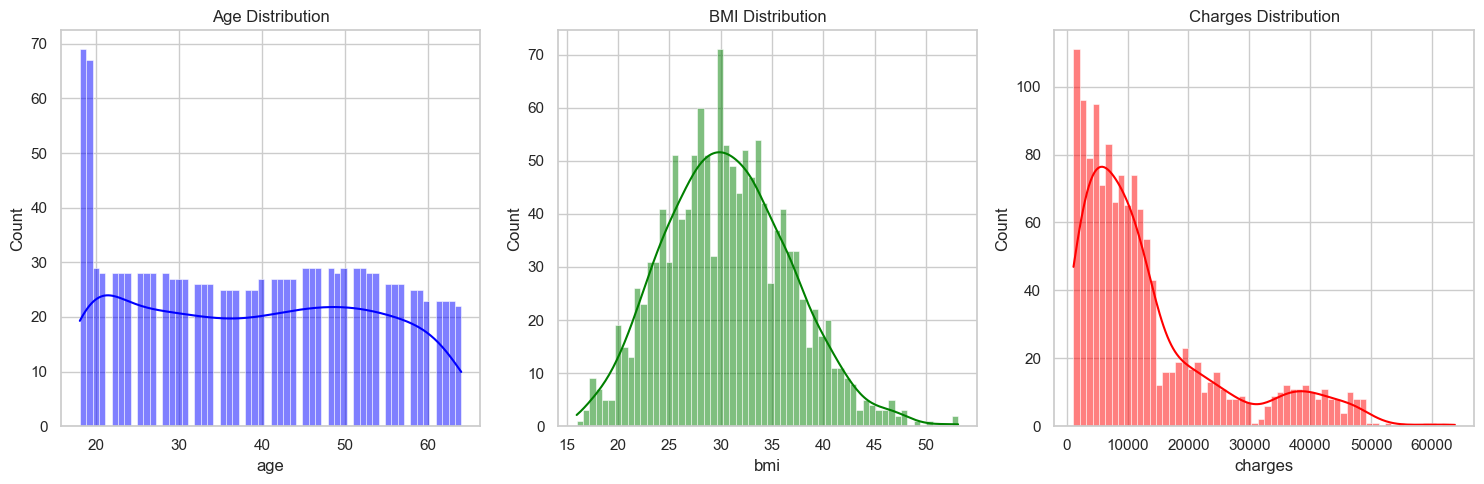

In [20]:
# plotting hisograms or kde for age, bmi, and charges
# Setting the style for seaborn plots
sns.set(style='whitegrid')

# Plotting histograms for age, bmi, and charges
plt.figure(figsize=(15, 5))
# Creating subplots for each histogram
# using sns.histplot to plot histograms with KDE for better visualization
# Using bins=60 to have more granularity in the histograms

plt.subplot(1, 3, 1) # grid of 1 row and 3 columns, first subplot
sns.histplot(df['age'], kde=True, bins=60, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2) # grid of 1 row and 3 columns, second subplot
sns.histplot(df['bmi'], kde=True, bins=60, color='green')
plt.title('BMI Distribution')

plt.subplot(1, 3, 3) # grid of 1 row and 3 columns, third subplot
sns.histplot(df['charges'], kde=True, bins=60, color='red')
plt.title('Charges Distribution')

# using plt.tight_layout() to avoid overlapping of subplots
plt.tight_layout()
plt.show()


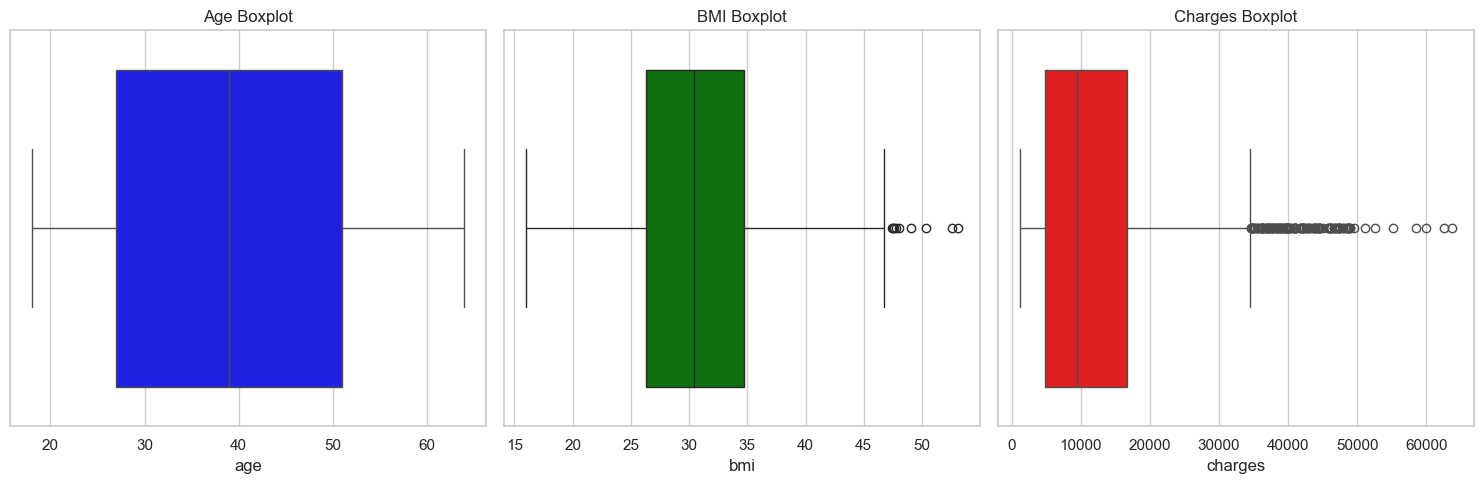

In [21]:
# Using boxplots to check for outliers in age, bmi, and charges
plt.figure(figsize=(15, 5))
# Creating subplots for each boxplot
plt.subplot(1, 3, 1)  # grid of 1 row and 3 columns, first subplot
sns.boxplot(x=df['age'], color='blue')
plt.title('Age Boxplot')

plt.subplot(1, 3, 2)  # grid of 1 row and 3 columns, second subplot
sns.boxplot(x=df['bmi'], color='green')
plt.title('BMI Boxplot')
plt.subplot(1, 3, 3)  # grid of 1 row and 3 columns, third subplot
sns.boxplot(x=df['charges'], color='red')
plt.title('Charges Boxplot')

# using plt.tight_layout() to avoid overlapping of subplots and make the plot look better
plt.tight_layout()
plt.show()

As we can see in both the histograms and boxplots we find little outliers in the bmi and more in charges
 the distribution if bmi is more normal but charges is right skewd

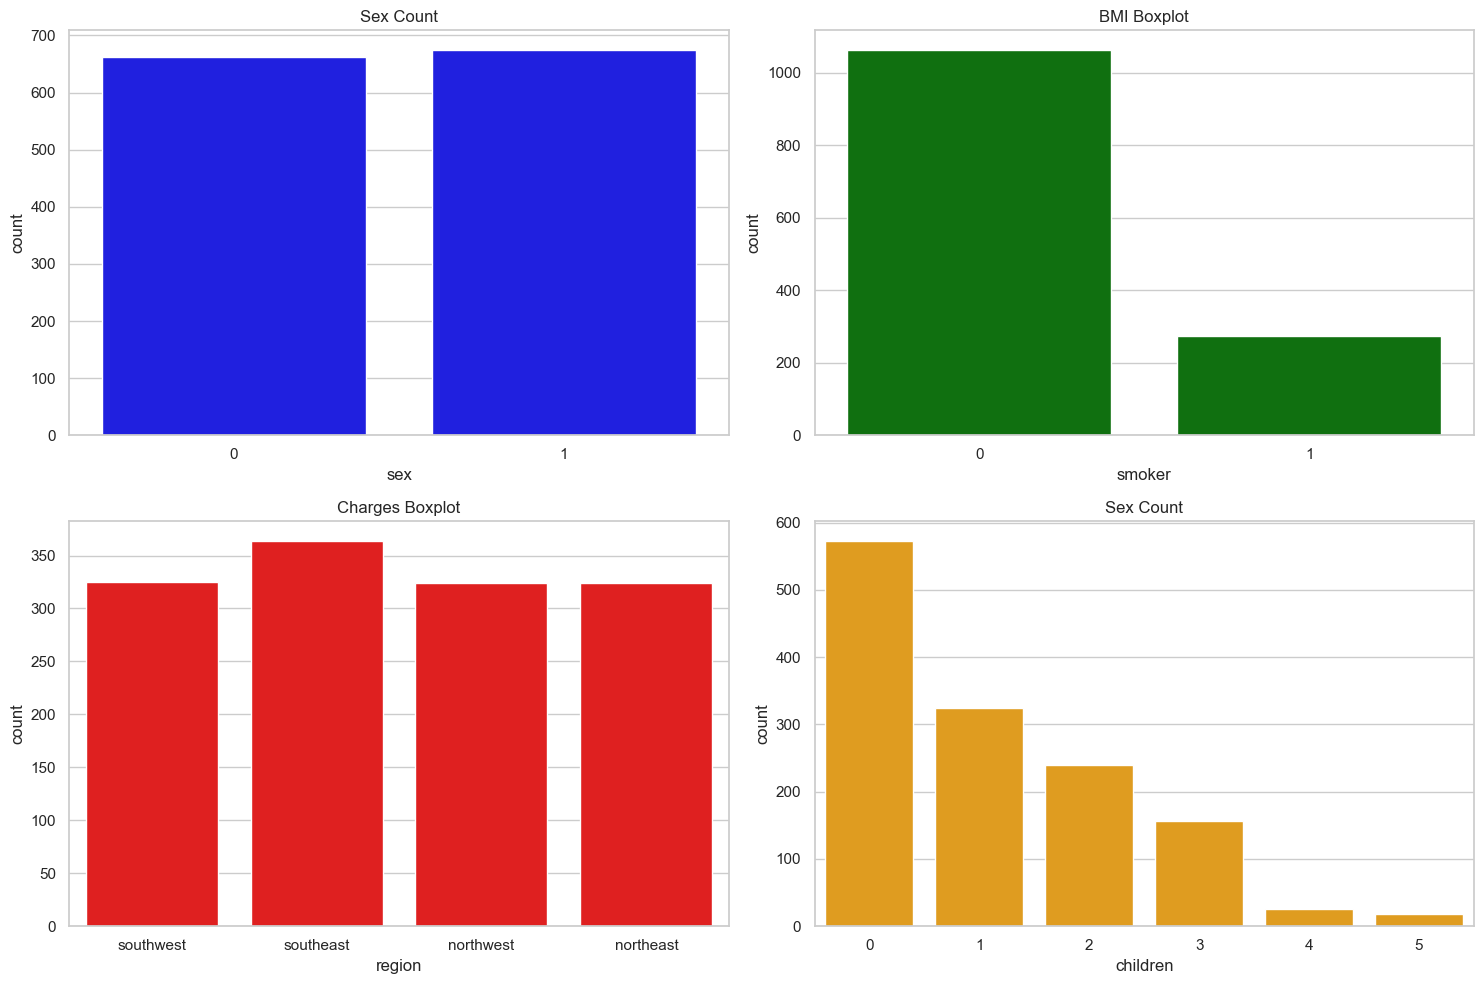

In [22]:
# using barplots to show counts for sex, smoker, region, and children
plt.figure(figsize=(15, 10))
# Creating subplots for each barplot
plt.subplot(2, 2, 1)  # grid of 2 rows and 2 columns, first subplot
sns.countplot(x=df['sex'], color='blue')
plt.title('Sex Count')

plt.subplot(2, 2, 2)  # grid of 2 rows and 2 columns, second subplot
sns.countplot(x=df['smoker'], color='green')
plt.title('BMI Boxplot')

plt.subplot(2, 2, 3)  # grid of 2 rows and 2 columns, third subplot
sns.countplot(x=df['region'], color='red')
plt.title('Charges Boxplot')

plt.subplot(2, 2, 4)  # grid of 2 rows and 2 columns, fourth subplot
sns.countplot(x=df['children'], color='orange')
plt.title('Sex Count')

# using plt.tight_layout() to avoid overlapping of subplots and make the plot look better
plt.tight_layout()
plt.show()

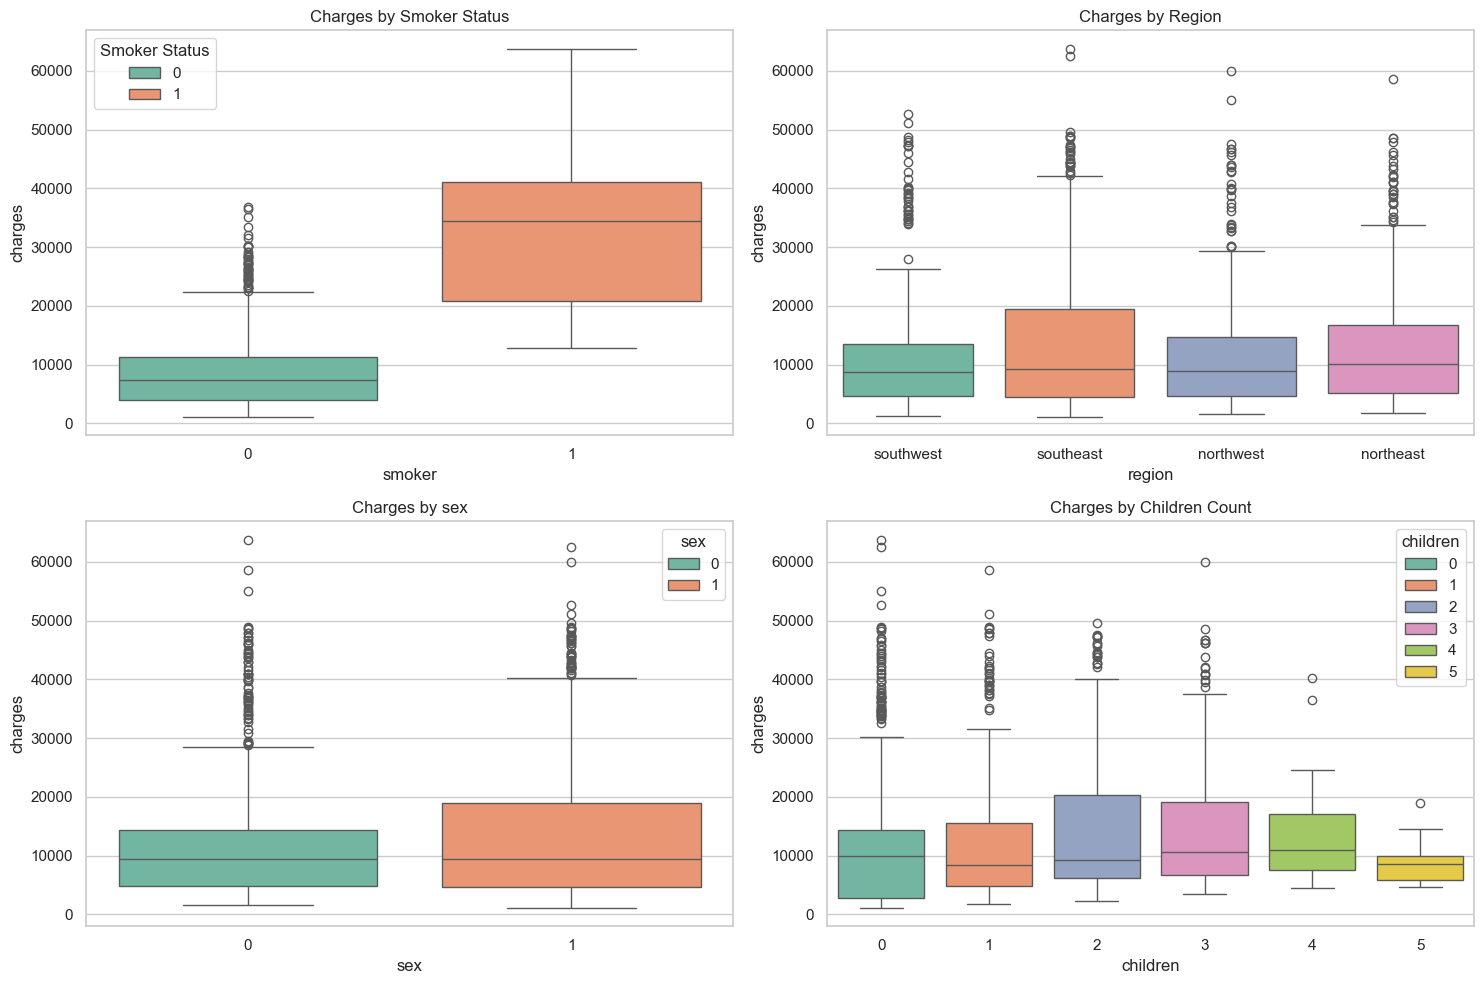

In [38]:
# using boxplots to compare charges across smoker, region, sex, and children
plt.figure(figsize=(15, 10))

# Creating subplots for each boxplot
# using palette='Set2' for better color differentiation, hue='smoker' to differentiate between smokers and non-smokers
# Setting each x value to hue for future proofing the code

plt.subplot(2, 2, 1)  # grid of 2 rows and 2 columns, first subplot
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2', hue='smoker')
plt.legend(title='Smoker Status', loc='upper left')
plt.title('Charges by Smoker Status')

plt.subplot(2, 2, 2)  # grid of 2 rows and 2 columns, second subplot
sns.boxplot(x='region', y='charges', data=df, palette='Set2', hue='region')
plt.title('Charges by Region')

plt.subplot(2, 2, 3)  # grid of 2 rows and 2 columns, third subplot
sns.boxplot(x='sex', y='charges', data=df, palette='Set2', hue='sex')
plt.title('Charges by sex')

plt.subplot(2, 2, 4)  # grid of 2 rows and 2 columns, fourth subplot
sns.boxplot(x='children', y='charges', data=df, palette='Set2', hue='children')
plt.title('Charges by Children Count')

# using plt.tight_layout() to avoid overlapping of subplots and make the plot look better
plt.tight_layout()
plt.show()

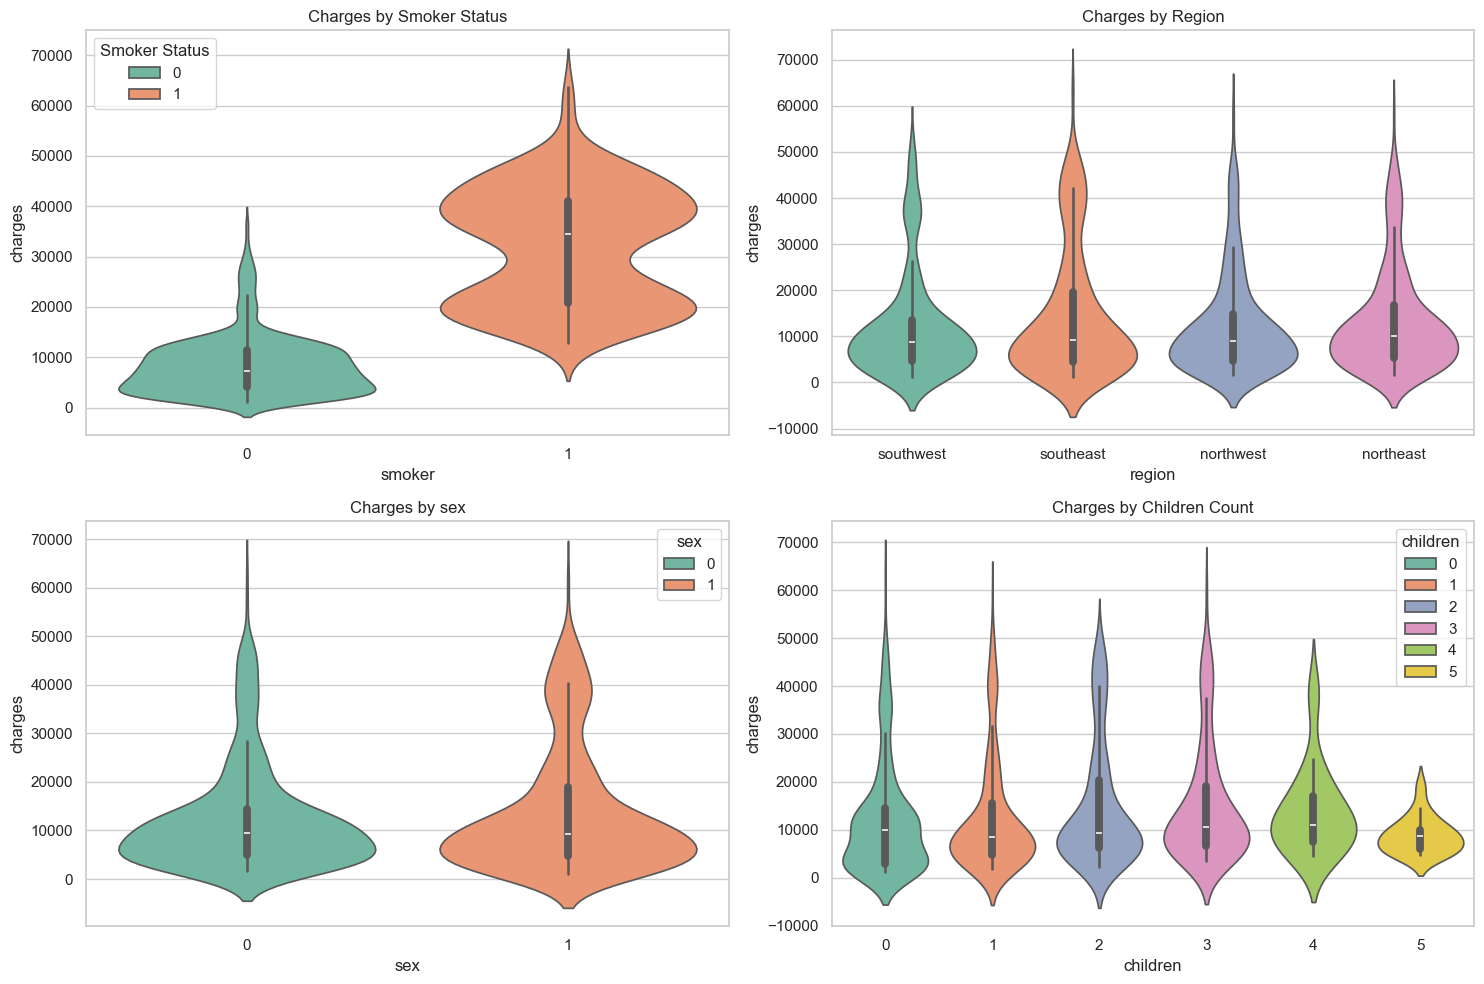

In [ ]:
# Using violinplots because it provides combined information of boxplot and KDE
plt.figure(figsize=(15, 10))

# Creating subplots for each violinplot
# using sns.violinplot to create violin plots for better visualization of the distribution of charges
# To show both smokers and non-smokers in the same plot use split=True 

plt.subplot(2, 2, 1)  # grid of 2 rows and 2 columns, first subplot
sns.violinplot(x='smoker', y='charges', data=df, palette='Set2', hue='smoker')
plt.legend(title='Smoker Status', loc='upper left')
plt.title('Charges by Smoker Status')

plt.subplot(2, 2, 2)  # grid of 2 rows and 2 columns, second subplot
sns.violinplot(x='region', y='charges', data=df, palette='Set2', hue='region')
plt.title('Charges by Region')

plt.subplot(2, 2, 3)  # grid of 2 rows and 2 columns, third subplot
sns.violinplot(x='sex', y='charges', data=df, palette='Set2', hue='sex')
plt.title('Charges by sex')

plt.subplot(2, 2, 4)  # grid of 2 rows and 2 columns, fourth subplot
sns.violinplot(x='children', y='charges', data=df, palette='Set2', hue='children')
plt.title('Charges by Children Count')

# using plt.tight_layout() to avoid overlapping of subplots and make the plot look better
plt.tight_layout()
plt.show()

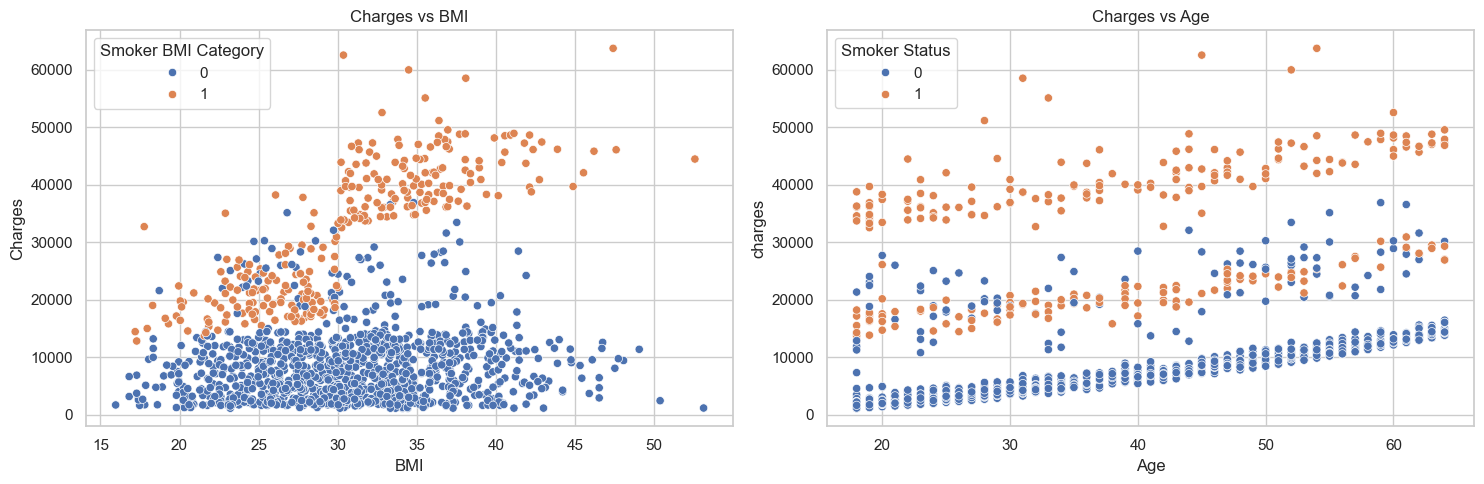

In [47]:
# Now we use scatter plots to explore relationships between charges and bmi, and age
# Also Coloring points by smoker status by using hue parameter
plt.figure(figsize=(15, 5))

# Creating subplots for each scatter plot
plt.subplot(1, 2, 1)  # grid of 1 row and 2 columns, first subplot
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker BMI Category', loc='upper left')

plt.subplot(1, 2, 2)  # grid of 1 row and 2 columns, second subplot
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('charges')
plt.legend(title='Smoker Status', loc='upper left')

plt.tight_layout()
plt.show()


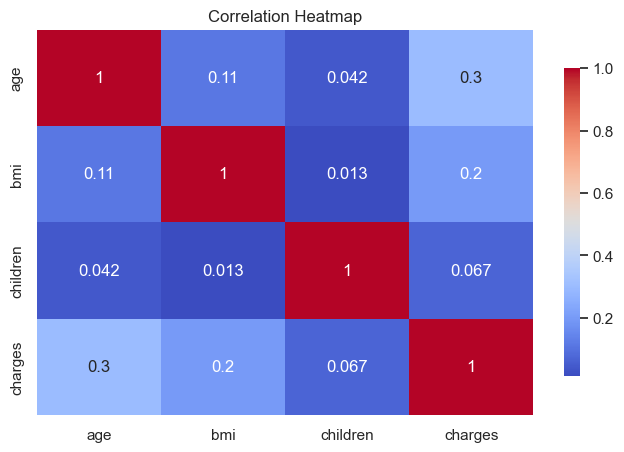

In [57]:
# Plotting a heatmap to show correlation between numeric features: age, bmi, children, and charges
plt.figure(figsize=(8, 5))

# Using sns.heatmap to create a heatmap of the correlation matrix
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()

# using annot=True to show correlation values
# Using cbar_kws to adjust the color bar size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

<Figure size 500x500 with 0 Axes>

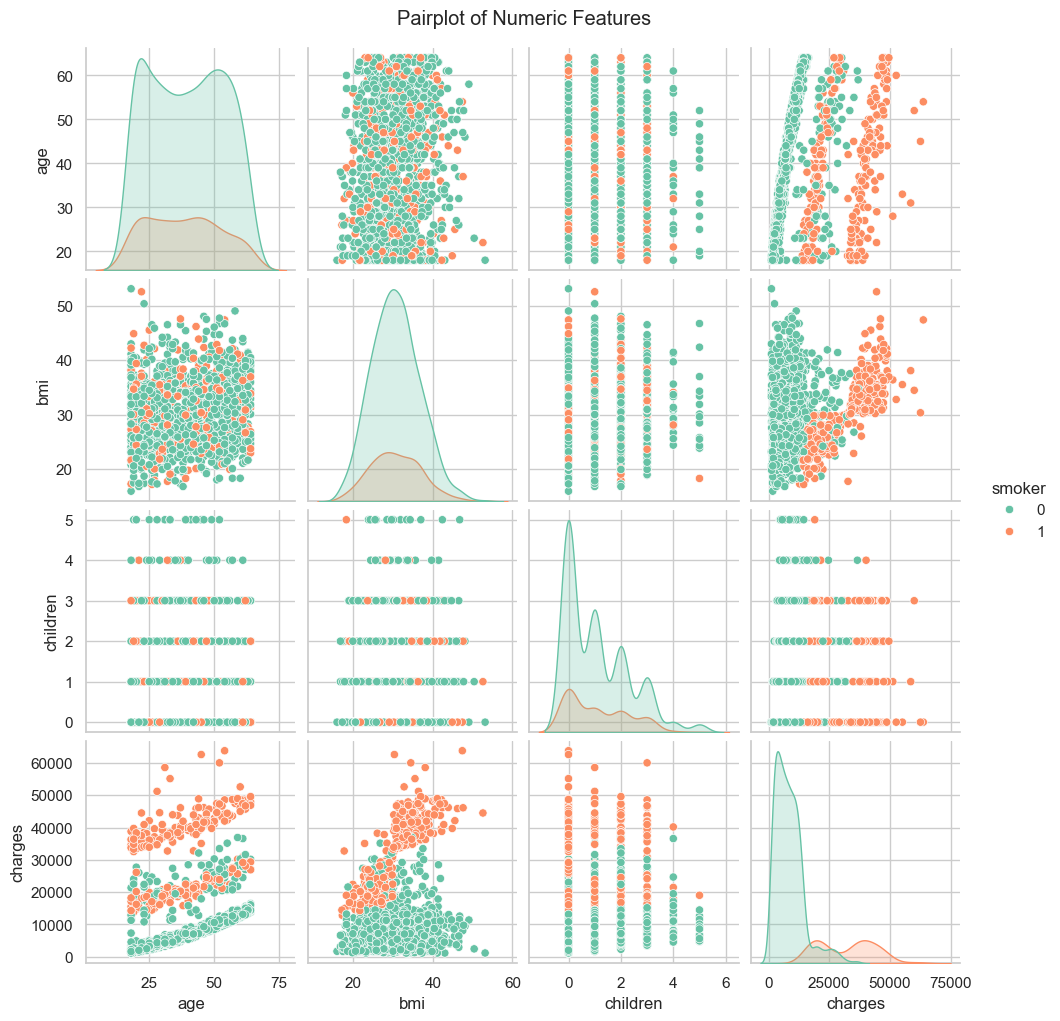

In [62]:
# Using pairplot to visualize relationships between all numeric features
plt.figure(figsize=(5, 5))

# Using sns.pairplot to create pair plots of numeric features
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker', palette='Set2')
# Using plt.suptitle to add a title to the pairplot
plt.suptitle('Pairplot of Numeric Features', y=1.02)  # Adjusting the title position
plt.show()